In [22]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img

In [24]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/archive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train_path ="/content/drive/MyDrive/archive (1)/fruits-360/Training"
test_path = "/content/drive/MyDrive/archive (1)/fruits-360/Validation"

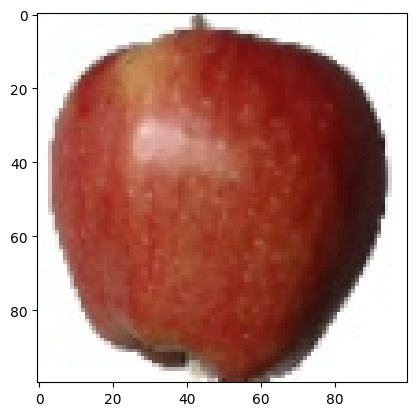

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
image_path = "/content/drive/MyDrive/archive (1)/fruits-360/Training/Apple Red 1/107_100.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis("on")
plt.show()


In [27]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [28]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)       

In [29]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 4864 images belonging to 10 classes.
Found 1619 images belonging to 10 classes.


In [31]:
hist = model.fit_generator(generator = train_generator,
                   steps_per_epoch = 10,
                   epochs = 10,
                   validation_data = test_generator,
                   validation_steps = 10)

<ipython-input-31-a5b1be2215da>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/10
10/10 [==============================] - 59s 6s/step - loss: 2.3024 - accuracy: 0.0812 - val_loss: 2.3007 - val_accuracy: 0.1094
Epoch 2/10
10/10 [==============================] - 44s 4s/step - loss: 2.3011 - accuracy: 0.0875 - val_loss: 2.2940 - val_accuracy: 0.1562
Epoch 3/10
10/10 [==============================] - 42s 4s/step - loss: 2.2881 - accuracy: 0.1375 - val_loss: 2.2779 - val_accuracy: 0.1656
Epoch 4/10
10/10 [==============================] - 43s 4s/step - loss: 2.2760 - accuracy: 0.1219 - val_loss: 2.2745 - val_accuracy: 0.0844
Epoch 5/10
10/10 [==============================] - 41s 4s/step - loss: 2.2954 - accuracy: 0.0875 - val_loss: 2.2591 - val_accuracy: 0.1187
Epoch 6/10
10/10 [==============================] - 40s 4s/step - loss: 2.2733 - accuracy: 0.1094 - val_loss: 2.2443 - val_accuracy: 0.1750
Epoch 7/10
10/10 [==============================] - 39s 4s/step - loss: 2.2604 - accuracy: 0.1312 - val_loss: 2.2089 - val_accuracy: 0.1688
Epoch 8/10
10/10 [==

In [32]:
from keras.models import load_model

model.save("Fruitmodel.h5")

In [33]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [34]:
test_generator.classes[500]

3

In [35]:
predictions = probability_model.predict(test_generator)

51/51 [==============================] - 45s 888ms/step


In [36]:
b=predictions[8]
print(b)

[0.09296189 0.10327802 0.11181918 0.10548696 0.10551504 0.09339935
 0.09628639 0.09821818 0.09672164 0.09631344]


In [37]:
np.argmax(b)

2

In [38]:
import os

folder = '/content/drive/MyDrive/archive (1)/fruits-360/Validation'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[9])

Apple Braeburn
